## Loading the dataset

In [9]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalizing the data set

In [10]:
x_train=x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Flattening the data set

In [11]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


## Converting to one hot vector

In [12]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Building the first model with hidden layer of size 32 and sigmoid activation functions

In [13]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Training and evaluating the model

In [17]:
import matplotlib.pyplot as plt
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)


print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.445
Test accuracy: 0.893


# Repeating the model with different sizes and activation functions

In [27]:
plot_dictionary ={}
for activation in ['sigmoid','relu','tanh']:
  plot_dictionary[activation] = []
  for size in [32,64,128,256]:
    scores =[]
    image_size = 784 # 28*28
    num_classes = 10 # ten unique digits

    model = Sequential()

    # The input layer requires the special input_shape parameter which should match
    # the shape of our training data.
    model.add(Dense(units=size, activation=activation, input_shape=(image_size,)))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.summary()
    model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    print(activation,size)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    plot_dictionary[activation].append(accuracy)
print(plot_dictionary)
  


Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 32)                25120     
                                                                 
 dense_113 (Dense)           (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
sigmoid 32
Test loss: 1.04
Test accuracy: 0.797
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 64)                50240     
                                                                 
 dense_115 (Dense)           (None, 10)                650       
                                            

## Comparing and Visualizing Data

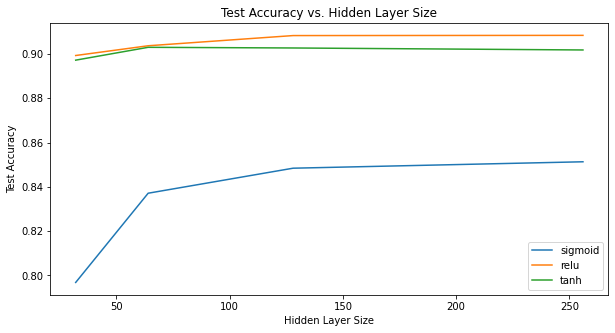

In [28]:
# Plot the results
sizes= [32,64,128,256]
plt.figure(figsize=(10,5))
for activation in plot_dictionary:
    plt.plot(sizes, plot_dictionary[activation], label=activation)
plt.legend()
plt.title("Test Accuracy vs. Hidden Layer Size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Test Accuracy")
plt.show()

### Model with greatest accuracy is one with activation function relu and size of hidden layer 256

### **Saving the model**

In [20]:
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')


model.save('mnist nueral')



Test loss: 0.334
Test accuracy: 0.91
